In [57]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint 
import matplotlib.pyplot as plt

tmin = 0
tmax = 100
dt = 0.01
num_iter = int((tmax-tmin)/dt)
#T = np.linspace(tmin,tmax,500)

#Value of constants  
I = 20
Vin = -60
gNa = 120  
eNa = 50
gK = 36  
eK = -77 
gL = 0.3  
eL = -54.387
Cm = 1

def alphaM(Vi):
    return 0.1*(Vi+40.0)/(1.0 - np.exp(-(Vi+40.0) / 10.0))

def betaM(Vi):
    return (4*np.exp(-(Vi+65)/18))

def alphaH(Vi):
    return (0.07*np.exp(-(Vi+65)/20))

def betaH(Vi):
    return 1.0/(1.0 + np.exp(-(Vi+35.0) / 10.0))

def alphaN(Vi):
    return 0.01*(Vi+55.0)/(1.0 - np.exp(-(Vi+55.0) / 10.0))

def betaN(Vi):
    return (0.125*np.exp(-(Vi+65)/80))

def dVdt(V,t):
    v, m, n, h = V

    dvdt = I - gNa*m**3*h*(v - eNa) - gK*n**4*(v - eK) - gL*(v - eL)
    dmdt = (alphaM(v)*(1-m) - betaM(v)*m)
    dndt = (alphaN(v)*(1-n) - betaN(v)*n)
    dhdt = (alphaH(v)*(1-h) - betaH(v)*h)

    return dvdt, dmdt, dndt, dhdt

T = np.arange(tmin,tmax,dt)
V0 = [-60, .5, .5,0.06]
sol = odeint(dVdt, V0, T)

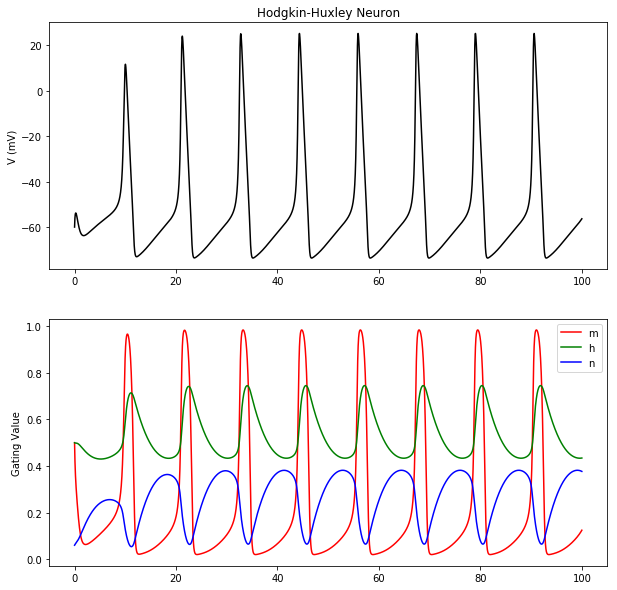

In [58]:
V = sol[:,0]
m = sol[:,1]
h = sol[:,2]
n = sol[:,3]

plt.figure(figsize=(10, 10))

plt.subplot(2,1,1)
plt.title('Hodgkin-Huxley Neuron')
plt.plot(T, V, 'k')
plt.ylabel('V (mV)')


plt.subplot(2,1,2)
plt.plot(T, m, 'r', label='m')
plt.plot(T, h, 'g', label='h')
plt.plot(T, n, 'b', label='n')
plt.ylabel('Gating Value')
plt.legend()

plt.show()